# Lab 5

## Part 1:  Questions

---
### 1.  

*(see HOML 10-4)*

Why was the sigmoid activation function a key ingredient in training the first MLPs?

The logistic sigmoid activation function is smooth at all points so it's derivative is always non zero which allows the gradient descent method to find smaller values of theta after each iteration.

---
### 2. 

*(See HOML 10-5)* 

Name three popular activation functions. Can you draw them?

1. Rectified Linear Activation (ReLU)
2. Logistic (Sigmoid)
3. Hyperbolic Tangent (Tanh)

Text(0.5, 1.0, 'ReLU Activation')

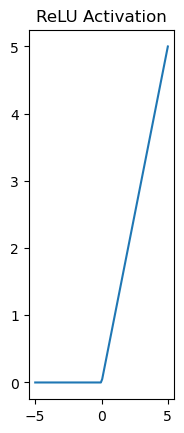

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

x = np.linspace(-5, 5, 100)

#Rectified Linear Activation
relu = np.maximum(0, x)
plt.subplot(132)
plt.plot(x, relu)
plt.title('ReLU Activation')

Text(0.5, 1.0, 'Sigmoid Activation')

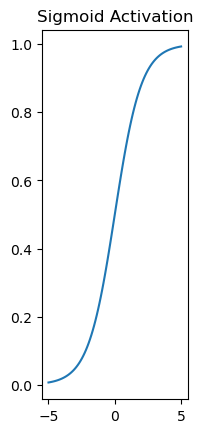

In [5]:
#Sigmoid 
sigmoid = 1 / (1 + np.exp(-x))
plt.subplot(131)
plt.plot(x, sigmoid)
plt.title('Sigmoid Activation')

Text(0.5, 1.0, 'Tanh Activation')

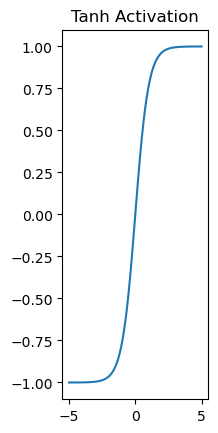

In [6]:
# Tanh
tanh = np.tanh(x)
plt.subplot(133)
plt.plot(x, tanh)
plt.title('Tanh Activation')

---
### 3. 

*(See HOML 10-6)*

Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.

(a.) What is the shape of the input matrix $X$?

Its shape is determined by the number of input features/attributes. If each passthrough neuron represents one feature/attribute, then the shape is a matrix with number of instances as the number of rows and the number of columns is the number of features. 

So with a batch size of m, input matrix X would be (m x 10). 

(b.) What are the shapes of the hidden layer’s weight matrix $W_h$ and bias vector $b_h$?


This shape will depend on the number of artificial neurons in the hidden layer and the number of input features in the input layer. So for this scenario it would be (10 x 50). 

The shape of the bias vector is determined by the number of artificial neurons in the hidden layer. This would come to having a length of 50. There is one bias term for each artificial neuron in the hidden layer. 

(c.) What are the shapes of the output layer’s weight matrix $W_o$ and bias vector $b_o$?


This shape depends on the number of artificial neurons in the hidden layer. So for this scenario, it is (50 x 3). 

The shape of the bias vector depends on the number of artificial neurons in the ourput layer. So for this scenario, it has length 3. 

(d.) What is the shape of the network’s output matrix $Y$?

Matrix Y is determined by the number of instances and the number of artificial neurons in the output layer. So for this scenario it is (m x 3)

(e.) Write the equation that computes the network’s output matrix $Y$ as a function of $X$, $W_h$, $b_h$, $W_o$, and $b_o$.

Y = (X * Wh + bh) * (Wo + bo)

---
### 4.

*(See HOML 10-9)*

Can you list all the hyperparameters you can tweak in a basic MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?

1. Number of hidden layers 
2. Number of neurons in each hidden layer
3. Activation function used in each hidden layer and in the output layer 
4. the weight initialization logic 
5. learning rate
6. batch size 
6. epochs
7. regularization 
8. dropout 
9. weight initialization 
10. optimizer 
11. early stopping 

IF the MLP overfits the training data, you can try reducing the number of neurons per hidden layer. You can also try adjusting the activation function used by each neuron. 

---
### 5.
Do all the activities in HOML 10-1:

The [TensorFlow playground](https://playground.tensorflow.org/) is a handy neural network simulator built by the TensorFlow team. In this exercise, you will train several binary classifiers in just a few clicks, and tweak the model’s architecture and its hyperparameters to gain some intuition on how neural networks work and what their hyperparameters do. 

There isn't anything to submit for any of the parts except for part (g.).  

**Take some time to explore the following:**

(a.) **The patterns learned by a neural net.** Try training the default neural network by clicking the Run button (top left). Notice how it quickly finds a good solution for the classification task. The neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into more complex patterns. In general, the more layers there are, the more complex the patterns can be.


(b). **Activation functions.** Try replacing the tanh activation function with a ReLU activation function, and train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. This is due to the shape of the ReLU function.


(c.) **The risk of local minima.** Modify the network architecture to have just one hidden layer with three neurons. Train it multiple times (to reset the network weights, click the Reset button next to the Play button). Notice that the training time varies a lot, and sometimes it even gets stuck in a local minimum.

(d.) **What happens when neural nets are too small.** Remove one neuron to keep just two. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. The model has too few parameters and systematically underfits the training set.


(e.) **What happens when neural nets are large enough.** Set the number of neurons to eight, and train the network several times. Notice that it is now consistently fast and never gets stuck. This highlights an important finding in neural network theory: large neural networks rarely get stuck in local minima, and even when they do these local optima are often almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time.



(f.) **The risk of vanishing gradients in deep networks.** Select the spiral dataset (the bottom-right dataset under “DATA”), and change the network architecture to have four hidden layers with eight neurons each. Notice that training takes much longer and often gets stuck on plateaus for long periods of time. Also notice that the neurons in the highest layers (on the right) tend to evolve faster than the neurons in the lowest layers (on the left). This problem, called the vanishing gradients problem, can be alleviated with better weight initialization and other techniques, better optimizers (such as AdaGrad or Adam), or batch normalization (discussed in Chapter 11).



(g.) **Report your experience.** Write a few sentences about something you learned or gained a better understanding of with this problem. 

I thought it was interesting to see how replacing the tanh activation function with a ReLu activation finds the solution faster but linearly. It is faster because ReLu is linear for positive values so it doesn't suffer from vanishing gradients. Relu is a sparse activation fucntion because it sets all negative values to zero. This helps the network focus on the most important features and reduce overfitting. Relu is computationally efficient because it involves simple thresholding. It also does not have the same saturation issue that tanh has. 


---
## Part 2: Wildfire Classification 

Find the file called “utah fires.csv” (in “Fires” folder of [data repo](https://github.com/esnt/Data)). This is a subset of a Kaggle dataset about wildfires in the United States from 1992 - 2015. I’d like you to build a classifier that predicts if the fire was started naturally or by a human.


Prepare the data:
* Split the data into a training and test set with 25% of the data in the test set and random state=307.
* Create a processing pipeline using that fills missing values and transforms the predictors to the same scale.
* Update the X-training data by first fitting and then transforming the original X- training data with the processing pipeline
* Update the X-test data by transforming the original X-test data with the pipeline trained in the previous step

(a.) Build a quick and easy baseline model, for example a random forest classifier.  
* Report and the test accuracy
* Plot the ROC curve

In [9]:
import os 
print(os.getcwd())

/Users/marynydegger/Documents/FALL2023/STAT486/Assignments/lab-05-MaryNydegger


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [15]:
fires = pd.read_csv('utah_fires.csv')
fires


,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,LATITUDE,LONGITUDE,FIRE_SIZE,NWCG_CAUSE_CLASSIFICATION
0,2005,179,1654.0,40.088889,-111.378333,0.1,Natural
1,2005,199,1600.0,41.264167,-111.795833,0.1,Human
2,2005,223,600.0,41.258333,-111.849722,0.1,Natural
3,2005,151,1355.0,39.316667,-111.228333,0.1,Human
4,2005,145,2115.0,37.871944,-111.658056,0.1,Natural
...,...,...,...,...,...,...,...
31465,2018,290,1645.0,41.107510,-111.775703,0.5,Human
31466,2018,291,1340.0,40.581379,-111.260300,0.1,Human
31467,2018,301,1830.0,41.356049,-112.133202,2.0,Human
31468,2018,308,1630.0,40.681641,-112.275002,0.5,Human


In [23]:
# Preparing the data 

X = fires.drop(columns=['NWCG_CAUSE_CLASSIFICATION'])
y = fires['NWCG_CAUSE_CLASSIFICATION']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=307)

numerical_cols = X_train.select_dtypes(include=['float64']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with the mean
    ('scaler', StandardScaler())  # Standardize features by removing the mean and scaling to unit variance
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [24]:
# building a random forest classifier model 
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 307)
rf_classifier.fit(X_train_processed, y_train)
y_pred = rf_classifier.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.79


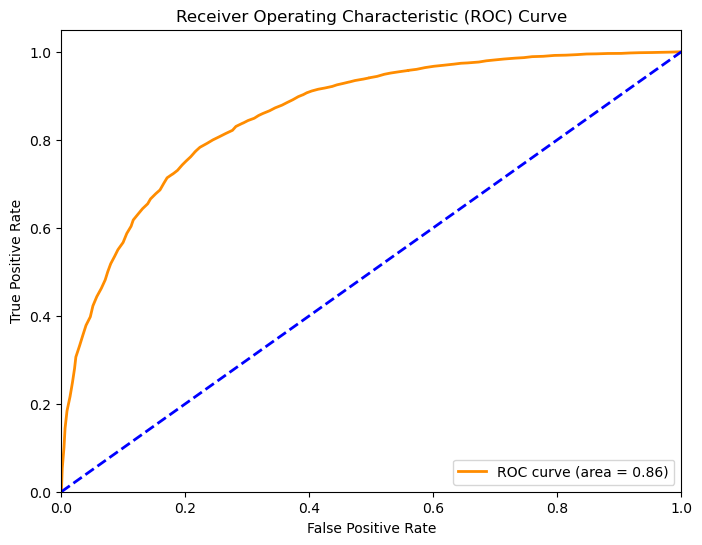

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt 

y_test_binary = (y_test == 'Natural').astype(int)

y_scores = rf_classifier.predict_proba(X_test_processed)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores)
roc_auc = roc_auc_score(y_test_binary, y_scores)

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'blue', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.show()

(b.) How many parameters are in an ANN with 2 hidden layers (100 and 50 nodes, respectively)

In [33]:
num_input_features = len(X_train_processed[0])
num_output_neurons = 1
num_neurons_hidden_layer1 = 100
num_neurons_hidden_layer2 = 50

total_parameters = (
    (num_neurons_hidden_layer1 * num_input_features)  
    + num_neurons_hidden_layer1 
    + (num_neurons_hidden_layer2 * num_neurons_hidden_layer1)  
    + num_neurons_hidden_layer2  
    + (num_output_neurons * num_neurons_hidden_layer2) 
    + num_output_neurons  
)

print(f'Total parameters: {total_parameters}')

Total parameters: 5601


(c.) Build the model from (b.) with the ReLU activation function and a learning rate of 0.1 using:
* MLPClassifer in `sklearn`
* Keras

In [27]:
# MLPClassifier 

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [34]:
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(100, 50),  
    activation='relu',             
    learning_rate_init=0.1,       
    random_state=307
)

mlp_classifier.fit(X_train_processed, y_train)
y_pred = mlp_classifier.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy using MLPClassifier: {accuracy:.2f}')

Accuracy using MLPClassifier: 0.72


In [37]:
# Keras 

import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

ModuleNotFoundError: No module named 'tensorflow'

In [38]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation='relu', input_dim=X_train_processed.shape[1]))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Assuming binary classification
learning_rate = 0.1
sgd = tf.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_processed, y_train_encoded, epochs=10, batch_size=32, verbose=1)

_, accuracy = model.evaluate(X_test_processed, y_test_encoded)
print(f"Accuracy using tf.keras: {accuracy:.2f}")

NameError: name 'LabelEncoder' is not defined

(d.) For model in part (c.) (either one, they should be very similar), report the test accuracy and plot the ROC curve.

In [39]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [40]:
y_pred = mlp_classifier.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy using MLPClassifier: {accuracy:.2f}')


Accuracy using MLPClassifier: 0.72


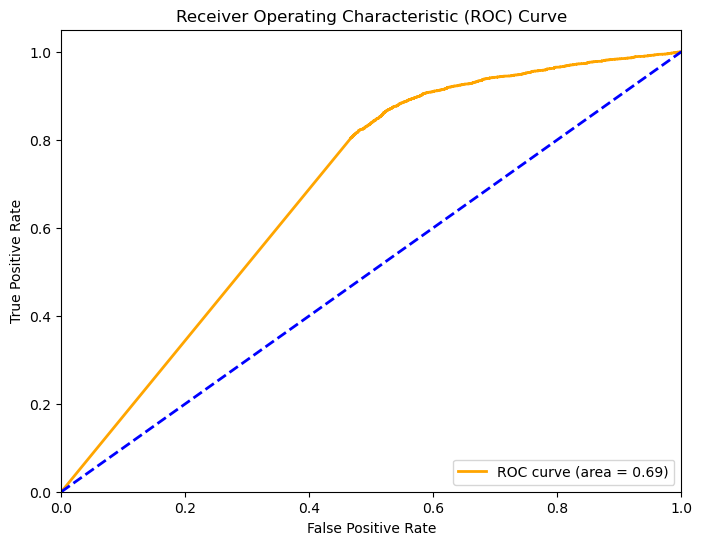

In [42]:
y_test_binary = (y_test == 'Natural').astype(int)
y_scores = mlp_classifier.predict_proba(X_test_processed)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores, pos_label=1)
roc_auc = roc_auc_score(y_test_binary, y_scores)

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'orange', lw = 2, label = f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'blue', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.show()

(e.)  Compare the MLP performance to the random forest.  Is there anything that you would suggest to help improve either model?

In comparing the performance, we see that MLP had accuracy of .72 and a ROC curve area of .69. The random forest model had accuracy of .79 and ROC area of .86.

The Random Forest model outperforms the MLP in both areas, which tells us that it could be better in discrimianting between the 2 classes and making correct predictions. A ROC area of .86 tells us that it can strongly differentiate between postiive and negative cases. 

Suggestions for improvement for the MLP model: 
- Architecture tuning: try different neural network architectures with different numbers of hidden layers, neurons, and different activation functions. 
- Hyperparameter tuning: optimize learning rate, batch size, and number of training epochs. 

Suggestions for improvement for the Random Forest Model:
- Hyperparameter tuning: try different hyperparameters like number of estimators.
- Feature selection: Try removing or selecting a subset of the most important features. 
- Ensemble methods: Try bagging or boosting. 

---

## Part 3: CNNs

Use [this kaggle flower recognition dataset](https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset/) to build a deep neural network that classifies the type of flower based on an image.  The code below will read the images into a training and validation dataset and resize the images to all have the same size.  The code assumes that the director structure is:
```
flower_images/
├── Lilly/
│   ├── image1.jpg
│   ├── image2.jpg
│   └── ...
├── Lotus/
│   ├── image1.jpg
│   ├── image2.jpg
│   └── ...
├── Orchid/
│   ├── image1.jpg
│   ├── image2.jpg
│   └── ...
├── Sunflower/
│   ├── image1.jpg
│   ├── image2.jpg
│   └── ...
├── Tulip/
│   ├── image1.jpg
│   ├── image2.jpg
│   └── ...

```


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, InputLayer
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

ModuleNotFoundError: No module named 'tensorflow'

In [43]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    'flower_images/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    'flower_images/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

NameError: name 'ImageDataGenerator' is not defined

Practice building different types of neural networks with this data.  See the instructions below.  

*If your computer doesn't have enough memory and/or processing power, you could consider using Google Colab where you have access to a GPU.  On my computer:*
* *a FFN with two hidden layers and 10 epochs took about 2 minutes* 
* *a CNN with three convolutional layers, one hidden dense layer and 10 epochs took about 4 minutes* 
* *the pre-trained model with 10 epochs took 22 minutes*

---
**(a.) Build a Feed Forward Neural Network (FFN) to classify the flower images.**

**Tips:**
- Remember to flatten the images into 1D arrays (could be done with a flatten layer).
- Experiment with different numbers of layers and nodes per layer.
- For an FFN, start with 2-3 hidden layers and 256-512 nodes per layer.
- Remember to use the appropriate input shape for the first layer.
- Overfitting can be a concern, so consider regularization techniques if necessary.



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
image_width = 150
image_height = 150
batch_size = 32
num_classes = 5
dataset_dir = 'flower_images'

datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  
    validation_split=0.2  
)

train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical',  
    subset='training'  
)

val_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical',  
    subset='validation'  
)

model = keras.Sequential([
    Flatten(input_shape=(image_width, image_height, 3)),  
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')  
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

num_epochs = 10  

history = model.fit(
    train_data,
    epochs=num_epochs,
    validation_data=val_data,
    verbose=2
)

test_loss, test_accuracy = model.evaluate(val_data, verbose=0)
print(f'Test Accuracy: {test_accuracy:.2f}')


---

**(b.) Convolutional Neural Network (CNN) to classify the flower images**

**Tips:**
- Start with 2-3 convolutional layers, increasing the number of filters in each layer (e.g., 32, 64, 128).
- A typical kernel size is `(3,3)`.
- Use a max pooling layer after each convolutional layer
- After convolutional layers, flatten the output and use one or two dense layers before the final classification layer.
- Experiment with the number of filters, kernel size, and pooling size.
- You can introduce `Dropout` layers to prevent overfitting.



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

num_epochs = 10 

history = model.fit(
    train_data,
    epochs=num_epochs,
    validation_data=val_data,
    verbose=2
)

test_loss, test_accuracy = model.evaluate(val_data, verbose=0)
print(f'Test Accuracy: {test_accuracy:.2f}')


---
**(c.) Borrow strength from a pre-trained model to classify the flower images.**

**Instructions:**
- Use a pre-trained model, such as VGG16 or ResNet50 
- Import your pre-trained model without the top classification layer.
- Freeze the layers of the pre-trained model to retain their learned weights.
- Add custom layers on top of the pre-trained model.
- Train only the custom layers (or fine-tune some top layers if desired).
- When adding custom layers, consider starting with a `Flatten` or `GlobalAveragePooling2D` layer followed by one or two `Dense` layers.
- Using a smaller learning rate can be beneficial when fine-tuning to avoid large weight updates.
- If you opt to fine-tune some layers of the pre-trained model, be careful about overfitting. A few last layers are often enough.



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(image_width, image_height, 3))
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(base_model.input, x)

model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Smaller learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

num_epochs = 10  

history = model.fit(
    train_data,
    epochs=num_epochs,
    validation_data=val_data,
    verbose=2
)

test_loss, test_accuracy = model.evaluate(val_data, verbose=0)
print(f'Test Accuracy: {test_accuracy:.2f}')


---

**(d.) Evaluation:**

After training each of the above models:

- Plot the training and validation accuracy and loss over epochs.
- Compare the final accuracy, precision, recall, and F1-score of the three models on the test dataset.
- Provide insights on which model performed best and hypothesize why.



In [ ]:
import matplotlib.pyplot as plt


In [ ]:
# accuracy 

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(ffn_history.history['accuracy'], label='FFN Training Accuracy', linestyle='-', marker='o')
plt.plot(ffn_history.history['val_accuracy'], label='FFN Validation Accuracy', linestyle='--', marker='o')
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy', linestyle='-', marker='o')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy', linestyle='--', marker='o')
plt.plot(transfer_learning_history.history['accuracy'], label='Transfer Learning Training Accuracy', linestyle='-', marker='o')
plt.plot(transfer_learning_history.history['val_accuracy'], label='Transfer Learning Validation Accuracy', linestyle='--', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

In [ ]:
# loss

plt.subplot(1, 2, 2)
plt.plot(ffn_history.history['loss'], label='FFN Training Loss', linestyle='-', marker='o')
plt.plot(ffn_history.history['val_loss'], label='FFN Validation Loss', linestyle='--', marker='o')
plt.plot(cnn_history.history['loss'], label='CNN Training Loss', linestyle='-', marker='o')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss', linestyle='--', marker='o')
plt.plot(transfer_learning_history.history['loss'], label='Transfer Learning Training Loss', linestyle='-', marker='o')
plt.plot(transfer_learning_history.history['val_loss'], label='Transfer Learning Validation Loss', linestyle='--', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()